Exploring Dandiset 000690: Allen Institute Openscope - Vision2Hippocampus project

**Important Note:** This notebook was AI-generated and has not been fully verified. Use caution when interpreting the code or results.

This notebook provides an overview of the Allen Institute Openscope - Vision2Hippocampus project, available as Dandiset 000690 on the DANDI Archive: https://dandiarchive.org/dandiset/000690

The notebook will cover the following:
- Loading the Dandiset metadata
- Accessing eye-tracking data
- Accessing running speed data
- Visualizing pupil area over time
- Visualizing running speed over time

### Required Packages
The following packages are required to run this notebook. Ensure that they are installed in your environment.
- pynwb
- h5py
- remfile
- matplotlib
- seaborn

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("000690")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Allen Institute Openscope - Vision2Hippocampus project
Dandiset URL: https://dandiarchive.org/dandiset/000690/0.250326.0015

Found 156 assets in the dataset

First 5 assets:
- sub-692077/sub-692077_ses-1300222049_probe-4_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-3_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-2_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049_probe-0_ecephys.nwb
- sub-692077/sub-692077_ses-1300222049.nwb


### Loading an NWB file and exploring its contents
In this section, we will load one of the NWB files in the Dandiset and explore its contents.
We will load the file `sub-692072/sub-692072_ses-1298465622.nwb`.

In [2]:
import pynwb
import h5py
import remfile

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print some basic information about the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"Session ID: {nwb.session_id}")
print(f"Session Start Time: {nwb.session_start_time}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.6.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.3.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: Data and metadata for an Ecephys session
Session ID: 1298465622
Session Start Time: 2023-09-21 00:00:00-07:00


Link to this NWB file on neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/fbcd4fe5-7107-41b2-b154-b67f783f23dc/download/&dandisetId=000690&dandisetVersion=draft

### Accessing and visualizing eye-tracking data
This NWB file contains eye-tracking data. We will access the pupil tracking data and visualize the pupil area over time.

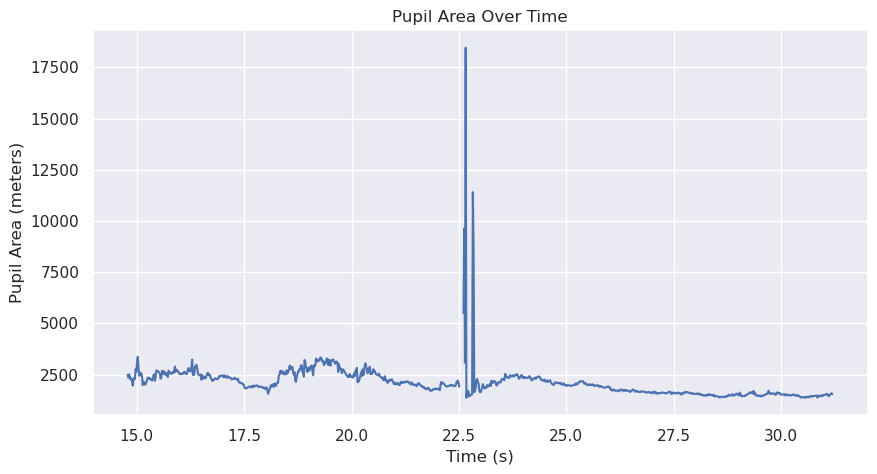

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Get the eye tracking data
eye_tracking = nwb.acquisition["EyeTracking"]
pupil_tracking = eye_tracking.pupil_tracking

# Load a subset of the data and timestamps
start = 0
end = 1000  # Load the first 1000 samples
pupil_area = pupil_tracking.area[:end]
timestamps = pupil_tracking.timestamps[:end]

# Plot the pupil area over time
plt.figure(figsize=(10, 5))
plt.plot(timestamps, pupil_area)
plt.xlabel("Time (s)")
plt.ylabel("Pupil Area (meters)")
plt.title("Pupil Area Over Time")
plt.show()

The plot shows the pupil area over time for the first 1000 samples. The pupil area ranges from approximately 1500 to 3500 meters, with a large spike around 22.5 seconds. This could indicate a response to a stimulus or some other event.

### Accessing and visualizing running speed data
This NWB file also contains running speed data. We will access the running speed data and visualize the running speed over time.

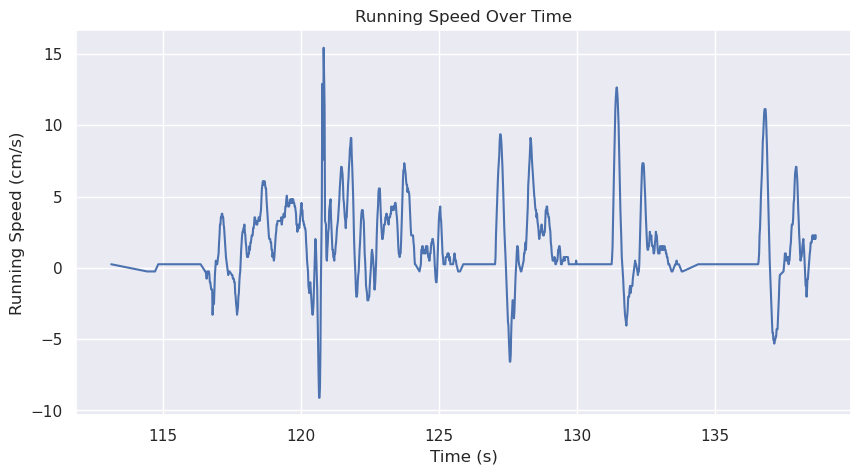

In [4]:
# Get the running speed data
running = nwb.processing["running"]
running_speed = running.data_interfaces["running_speed"]

# Load a subset of the data and timestamps
start = 0
end = 1000  # Load the first 1000 samples
speed_data = running_speed.data[:end]
timestamps = running_speed.timestamps[:end]

# Plot the running speed over time
plt.figure(figsize=(10, 5))
plt.plot(timestamps, speed_data)
plt.xlabel("Time (s)")
plt.ylabel("Running Speed (cm/s)")
plt.title("Running Speed Over Time")
plt.show()

The plot shows the running speed over time for the first 1000 samples. The running speed ranges from approximately -10 cm/s to 16 cm/s.

### Summary and Future Directions
This notebook provided a basic overview of how to access and visualize data from Dandiset 000690. We explored eye-tracking and running speed data.

Possible future directions for analysis include:
- Correlating eye-tracking data with running speed data
- Analyzing neural activity in relation to eye-tracking and running speed
- Exploring other data modalities available in the Dandiset